In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv("/content/appliances+energy+prediction.zip")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
#Checking the data types and missing value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [7]:
print(df.columns.tolist())


['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'day_of_week', 'month']


In [8]:
#EDA analysis
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:", num_cols)


Numeric columns: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [9]:
corr = df.corr(numeric_only=True)
target_corr = corr['Appliances'].sort_values(ascending=False)
print(target_corr)


Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
day_of_week    0.003060
Visibility     0.000230
rv2           -0.011145
rv1           -0.011145
month         -0.011606
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


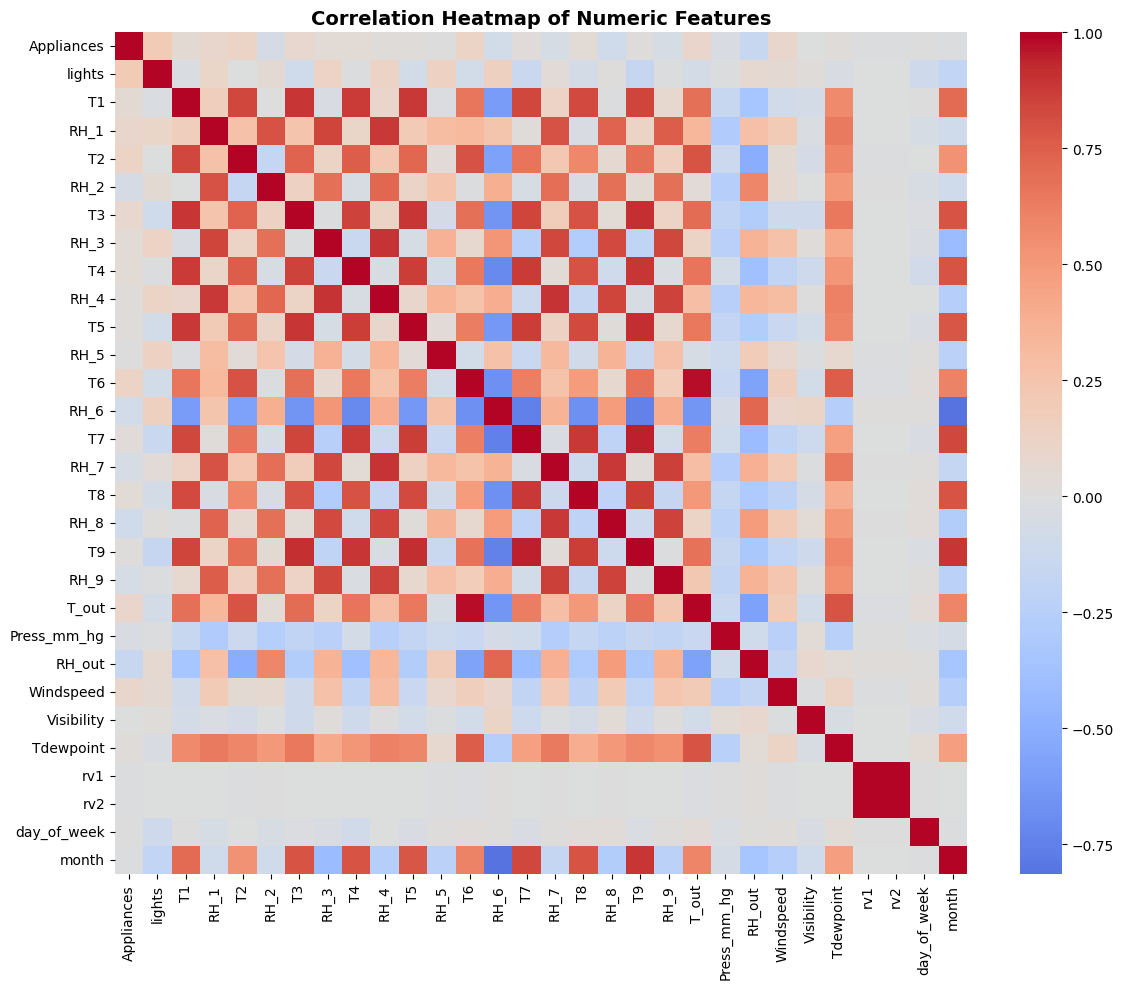

In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))                # set image size
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)  # "annot=True" if you want numbers inside boxes
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# interpreting what we see:

Dark red squares = strong positive correlation (features move together)

Dark blue squares = strong negative correlation (one increases while the other decreases)

Light gray = little or no relationship

#From the heatmap:

Temperature sensors (T1–T9) are highly correlated with each other — so you don’t need all of them.

Appliances has modest correlation with lights, T2, T6, and T_out.

RH_out (outside humidity) has a weak negative correlation.

rv1 and rv2 are synthetic random noise — safe to drop.

In [12]:
#feature Engikneering
feature_cols = [
    'lights',
    'T1', 'T2', 'T6',
    'RH_1', 'RH_out',
    'T_out', 'Windspeed', 'Tdewpoint'
]


In [13]:
#Adding one column
df['temp_diff'] = df['T2'] - df['T_out']
feature_cols.append('temp_diff')


In [14]:
X = df[feature_cols]
y = df['Appliances']


In [15]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test
    random_state=42
)

X_train.shape, X_test.shape


((15788, 10), (3947, 10))

In [16]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [17]:
#Evaluating linear regression model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_lin = lin_model.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", round(rmse_lin, 2))
print("Linear Regression R²:", round(r2_lin, 3))


Linear Regression RMSE: 94.79
Linear Regression R²: 0.102


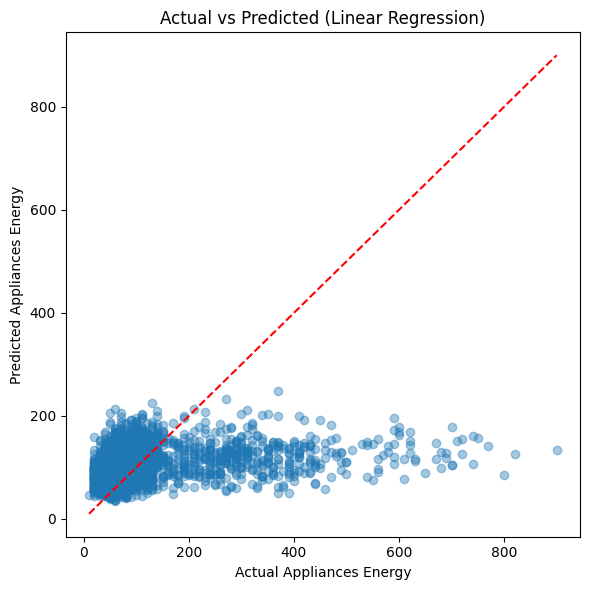

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.4)
plt.xlabel("Actual Appliances Energy")
plt.ylabel("Predicted Appliances Energy")
plt.title("Actual vs Predicted (Linear Regression)")

# Diagonal reference line
min_val = min(y_test.min(), y_pred_lin.min())
max_val = max(y_test.max(), y_pred_lin.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.tight_layout()
plt.show()


In [19]:
coeffs_lin = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lin_model.coef_
}).sort_values('Coefficient', ascending=False)

print(coeffs_lin)


     Feature  Coefficient
3         T6     8.411549
4       RH_1     4.819620
9  temp_diff     4.043828
1         T1     2.612164
0     lights     2.379787
7  Windspeed     1.172766
8  Tdewpoint     0.944013
5     RH_out    -2.061387
2         T2    -4.670787
6      T_out    -8.714615


In [20]:
print("Model Summary:")
print("----------------")
print("Linear Regression RMSE:", round(rmse_lin, 2))
print("Linear Regression R²:", round(r2_lin, 3))
print("\nInterpretation:")
print("- RMSE shows the average prediction error (lower is better).")
print("- R² shows how much of the energy variation the model explains (closer to 1 is better).")


Model Summary:
----------------
Linear Regression RMSE: 94.79
Linear Regression R²: 0.102

Interpretation:
- RMSE shows the average prediction error (lower is better).
- R² shows how much of the energy variation the model explains (closer to 1 is better).


In [21]:
#Random forest for better accuracy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", round(rmse_rf, 2))
print("Random Forest R²:", round(r2_rf, 3))


Random Forest RMSE: 70.78
Random Forest R²: 0.499


In [22]:
df['temp_diff'] = df['T2'] - df['T_out']
df['avg_indoor_temp'] = df[['T1','T2','T3','T6']].mean(axis=1)
df['avg_indoor_humidity'] = df[['RH_1','RH_2']].mean(axis=1)


In [23]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))



XGBoost R²: 0.3728291392326355
XGBoost RMSE: 79.22218927445454


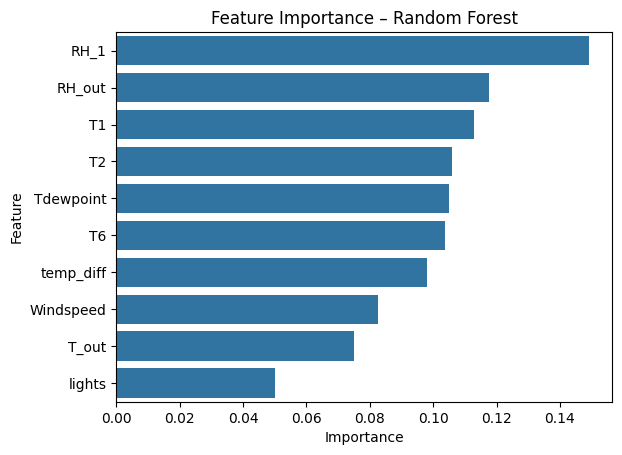

In [24]:
import seaborn as sns
fi = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_})
sns.barplot(data=fi.sort_values('Importance', ascending=False), x='Importance', y='Feature')
plt.title('Feature Importance – Random Forest')
plt.show()
